In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score   
%matplotlib inline


In [ ]:
# Import the Movies dataset
movies = pd.read_csv('https://raw.githubusercontent.com/Nishant20026/clustering/main/movies.csv')
movies.head

<bound method NDFrame.head of       movieId  ...                                       genres
0           1  ...  Adventure|Animation|Children|Comedy|Fantasy
1           2  ...                   Adventure|Children|Fantasy
2           3  ...                               Comedy|Romance
3           4  ...                         Comedy|Drama|Romance
4           5  ...                                       Comedy
...       ...  ...                                          ...
9737   193581  ...              Action|Animation|Comedy|Fantasy
9738   193583  ...                     Animation|Comedy|Fantasy
9739   193585  ...                                        Drama
9740   193587  ...                             Action|Animation
9741   193609  ...                                       Comedy

[9742 rows x 3 columns]>

In [ ]:
# Import the ratings dataset
ratings = pd.read_csv('https://raw.githubusercontent.com/Nishant20026/clustering/main/ratings.csv')
ratings.head

<bound method NDFrame.head of         userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]>

In [ ]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')
# we have 610 user hence 610 x 9742 number of ratings can be possible,
# we only have 100836 ratings in total which is just 2% .


The dataset contains:  100836  ratings of  9742  movies.


In [ ]:
# Function to get the genre ratings
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings
# Calculate the average rating of romance and scifi movies
genre_ratings = get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head

<bound method NDFrame.head of      avg_romance_rating  avg_scifi_rating
1                  4.31              4.22
2                  4.50              3.88
3                  0.50              4.20
4                  3.38              2.83
5                  3.09              2.50
..                  ...               ...
606                3.74              3.56
607                3.52              3.25
608                2.89              3.30
609                3.20              3.00
610                3.73              3.66

[610 rows x 2 columns]>

In [ ]:
# Function to get the biased dataset
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset =    genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())      
    return biased_dataset

# Bias the dataset
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

# Printing the resulting number of records & the head of the dataset
print( "Number of records: ", len(biased_dataset))
biased_dataset.head


Number of records:  162


<bound method NDFrame.head of      index  avg_romance_rating  avg_scifi_rating
0        3                0.50              4.20
1        4                3.38              2.83
2        5                3.09              2.50
3        7                2.65              3.15
4        9                3.17              3.00
..     ...                 ...               ...
157    600                3.00              2.94
158    608                2.89              3.30
159    609                3.20              3.00
160      1                4.31              4.22
161      2                4.50              3.88

[162 rows x 3 columns]>

In [ ]:
## Doubt in the function. Ask the group

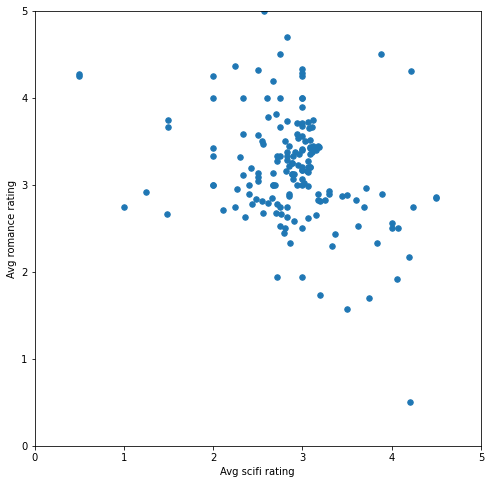

In [ ]:
# Defining the scatterplot drawing function
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)
# Plot the scatterplot
draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

In [ ]:
## What does the plot signify??

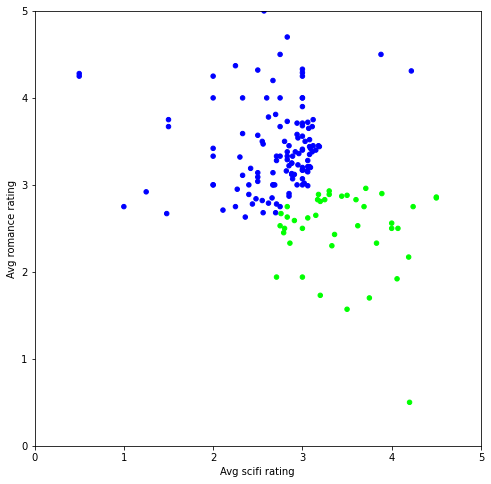

In [ ]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values

# Import KMeans
from sklearn.cluster import KMeans

# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions, cmap='brg'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap='brg')
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')

# Plot
draw_clusters(biased_dataset, predictions)

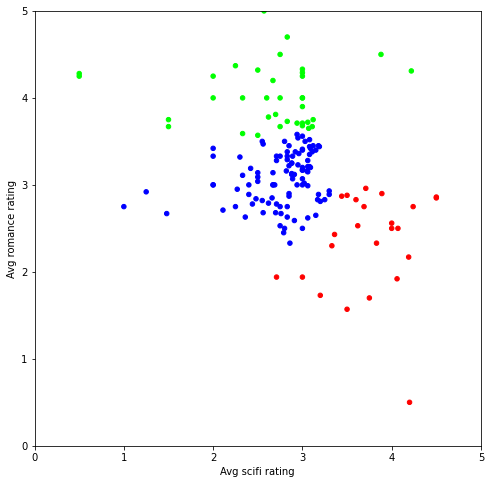

In [ ]:
# Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)
# Use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)
# Plot
draw_clusters(biased_dataset, predictions_2)

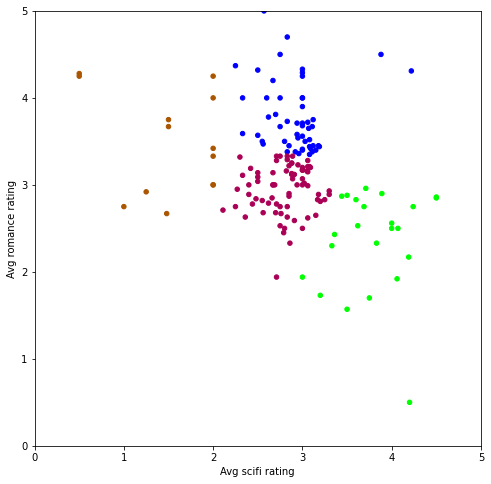

In [ ]:
# Create an instance of KMeans to find four clusters
kmeans_3 = KMeans(n_clusters=4)
# Use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)
# Plot
draw_clusters(biased_dataset, predictions_3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: ConvergenceWarning: Number of distinct clusters (157) found smaller than n_clusters (162). Possibly due to duplicate points in X.
  # Remove the CWD from sys.path while we load stuff.


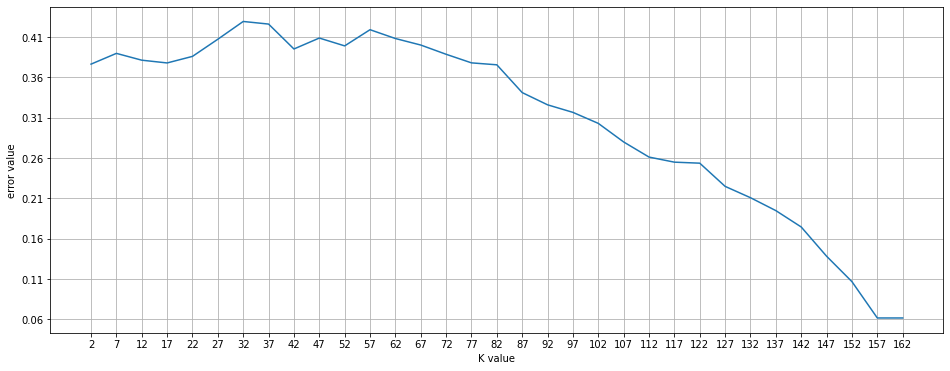

In [ ]:
# Selecting our dataset to study
df = biased_dataset[['avg_scifi_rating','avg_romance_rating']]

# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, len(X)+1, 5)   # X is the biased _dataset

# Define function to calculate the clustering errors
def clustering_errors(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions = kmeans.predict(data)
    #cluster_centers = kmeans.cluster_centers_
    # errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data.values, predictions)]
    # return sum(errors)
    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg

# Calculate error values for all k values we're interested in
errors_per_k = [clustering_errors(k, X) for k in possible_k_values]


# Plot the each value of K vs. the silhouette score at that value

fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xlabel('K value')
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_ylabel('error value')
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

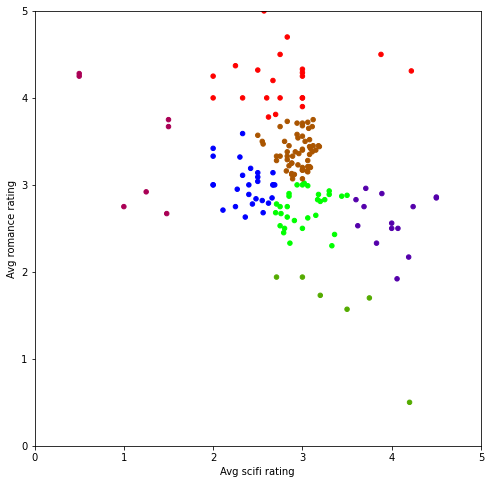

In [ ]:
# Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=7)
# Use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)
# Plot
draw_clusters(biased_dataset, predictions_4, cmap='brg')

In [ ]:
# Select our biased dataset and add action genre
biased_dataset_3_genres = get_genre_ratings(ratings, movies, ['Romance','Sci-Fi', 'Action'],['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])    

# Drop null values
biased_dataset_3_genres = bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

# Print the number of records and the head of our dataset
print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  161


,index,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,3,0.50,4.20,3.57
1,4,3.38,2.83,3.32
2,5,3.09,2.50,3.11
3,7,2.65,3.15,3.26
4,9,3.17,3.00,3.12


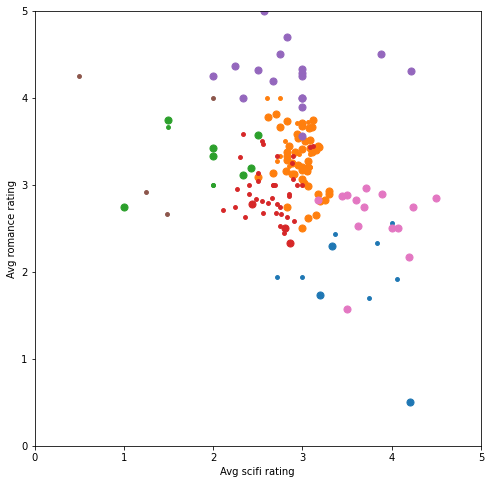

In [ ]:
# Turn dataset into a list
X_with_action = biased_dataset_3_genres[['avg_scifi_rating', 'avg_romance_rating', 'avg_action_rating']].values

# Create an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters=7)

# Use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X_with_action)

# Define 3d plotting function
def draw_clusters_3d(biased_dataset_3, predictions):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
    clustered = pd.concat([biased_dataset_3.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    colors = itertools.cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
    for g in clustered.group.unique():
        color = next(colors)
        for index, point in clustered[clustered.group == g].iterrows():
            if point['avg_action_rating'].astype(float) > 3: 
                size = 50
            else:
                size = 15
            plt.scatter(point['avg_scifi_rating'], 
                        point['avg_romance_rating'], 
                        s=size, 
                        color=color)
            
# Plot
draw_clusters_3d(biased_dataset_3_genres, predictions_5)

In [ ]:
#### Higher level of clustering ####

In [ ]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')


# Print he number of dimensions and a subset of the dataset
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:, :]

dataset dimensions:  (610, 9719) 

Subset example:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
# Define Function to get the most rated movies
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    
    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)

    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

# Pivot the dataset and choose the first 1000 movies
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000)

In [ ]:
# Define the sorting by rating function
def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    # Get most voting users
    # 1- Count
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    # 2- Sort
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    return most_rated_movies_users_selection


def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies


# choose the number of movies and users and sort
n_movies = 30
n_users = 18 
most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, n_movies, n_users)
# Print the result
print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),Fight Club (1999),Toy Story (1995),Star Wars: Episode V - The Empire Strikes Back (1980),"Usual Suspects, The (1995)",American Beauty (1999),Seven (a.k.a. Se7en) (1995),Independence Day (a.k.a. ID4) (1996),Apollo 13 (1995),Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),"Lord of the Rings: The Fellowship of the Ring, The (2001)",Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)","Fugitive, The (1993)",Batman (1989),Saving Private Ryan (1998),"Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Return of the King, The (2003)",Aladdin (1992),Fargo (1996),"Sixth Sense, The (1999)"
413,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0
589,5.0,4.5,4.5,3.5,4.0,5.0,4.0,4.0,4.5,5.0,3.5,4.0,5.0,4.5,3.0,3.0,4.0,4.5,5.0,4.5,4.5,5.0,4.0,3.5,4.0,5.0,4.5,4.0,4.0,3.5
473,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,4.0,4.0,5.0,4.0,3.5,4.0,4.0,4.5,4.0,5.0,4.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0
479,5.0,5.0,4.0,4.5,5.0,4.5,5.0,5.0,4.5,5.0,4.5,3.0,5.0,3.5,4.0,4.5,3.0,3.5,5.0,3.5,3.5,5.0,3.5,4.5,4.5,4.5,4.0,4.0,4.0,4.0
67,3.5,3.0,2.0,3.5,4.5,5.0,3.5,2.5,3.5,4.0,2.5,2.5,5.0,3.0,5.0,4.0,4.0,3.0,5.0,4.5,5.0,4.0,4.5,4.0,4.0,4.0,4.5,3.5,2.5,2.5


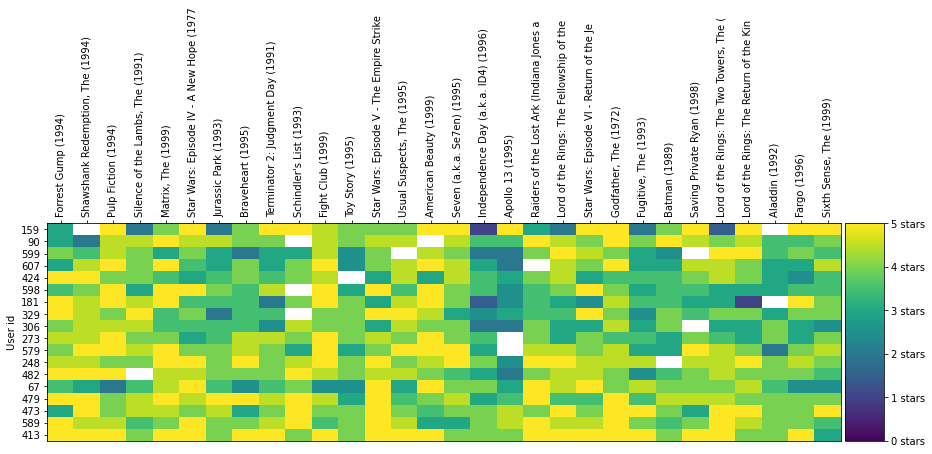

In [ ]:
# Define the plotting heatmap function
def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')
    if axis_labels:
        ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_movies_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User id')
# Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
# Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
plt.show()
# Print the heatmap
draw_movies_heatmap(most_rated_movies_users_selection)

In [ ]:
# Define Function to get the most rated movies
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies
# Pivot the dataset and choose the first 1000 movies
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000)
print(most_rated_movies_1k)

title  Forrest Gump (1994)  ...  Jacob's Ladder (1990)
0                      4.0  ...                    NaN
1                      NaN  ...                    NaN
2                      NaN  ...                    NaN
3                      NaN  ...                    NaN
4                      NaN  ...                    NaN
..                     ...  ...                    ...
605                    4.0  ...                    NaN
606                    NaN  ...                    5.0
607                    3.0  ...                    NaN
608                    4.0  ...                    NaN
609                    3.0  ...                    NaN

[610 rows x 1000 columns]


In [ ]:
# Conversion to sparse csr matrix
#sparse_rating = csr_matrix(most_rated_movies_users_selection)                   
#sparse_ratings=most_rated_movies_1k 
#print(sparse_rating)

In [ ]:
df = most_rated_movies_1k
sparse_ratings = csr_matrix(df.astype(pd.SparseDtype("float", np.nan)).sparse.to_coo())
print(sparse_ratings)

  (0, 0)	4.0
  (0, 2)	3.0
  (0, 3)	4.0
  (0, 4)	5.0
  (0, 5)	5.0
  (0, 6)	4.0
  (0, 7)	4.0
  (0, 9)	5.0
  (0, 10)	5.0
  (0, 11)	4.0
  (0, 12)	5.0
  (0, 13)	5.0
  (0, 14)	5.0
  (0, 15)	5.0
  (0, 16)	3.0
  (0, 18)	5.0
  (0, 20)	5.0
  (0, 22)	5.0
  (0, 23)	4.0
  (0, 24)	4.0
  (0, 28)	5.0
  (0, 33)	5.0
  (0, 36)	5.0
  (0, 37)	3.0
  (0, 38)	4.0
  :	:
  (609, 932)	5.0
  (609, 936)	4.0
  (609, 938)	4.0
  (609, 941)	4.0
  (609, 942)	3.5
  (609, 944)	3.5
  (609, 946)	3.0
  (609, 947)	4.5
  (609, 955)	4.5
  (609, 957)	1.5
  (609, 958)	4.0
  (609, 963)	3.5
  (609, 966)	4.0
  (609, 967)	2.5
  (609, 969)	4.0
  (609, 973)	3.0
  (609, 974)	4.5
  (609, 975)	5.0
  (609, 977)	5.0
  (609, 978)	5.0
  (609, 984)	4.0
  (609, 986)	3.0
  (609, 989)	4.5
  (609, 990)	2.5
  (609, 994)	3.5


In [ ]:
# 20 clusters
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)
# Select the max number of users and movies heatmap cluster
max_users = 70
max_movies = 50
# Cluster and print some of them
clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
#print(predictions)
#predictions.shape()
#draw_movie_clusters(clustered, max_users, max_movies)

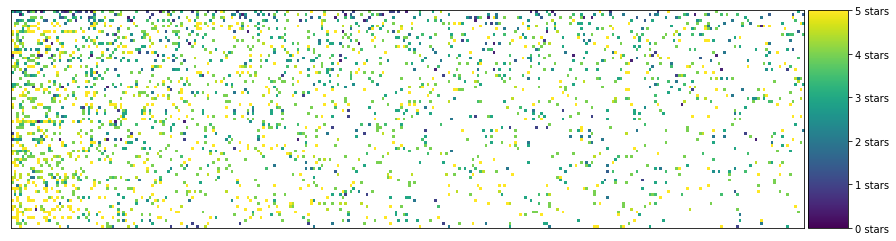

In [ ]:
# Pick a cluster ID from the clusters above
cluster_number = 11
# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)
# Sort and print the cluster
cluster = sort_by_rating_density(cluster, n_movies, n_users)
draw_movies_heatmap(cluster, axis_labels=False)

In [ ]:
# Print the ratings
cluster.fillna('').head()

,Forrest Gump (1994),Iron Man (2008),Harry Potter and the Prisoner of Azkaban (2004),"Bug's Life, A (1998)",Star Wars: Episode II - Attack of the Clones (2002),Iron Man 2 (2010),Harry Potter and the Deathly Hallows: Part 1 (2010),"Ring, The (2002)","Prestige, The (2006)",Inglourious Basterds (2009),Planet of the Apes (2001),Underworld (2003),Charlie's Angels: Full Throttle (2003),Halloween (1978),War of the Worlds (2005),Black Hawk Down (2001),"Day After Tomorrow, The (2004)",Sin City (2005),Evolution (2001),Casino Royale (2006),"Bourne Ultimatum, The (2007)",Team America: World Police (2004),X-Men: The Last Stand (2006),300 (2007),Starship Troopers (1997),Snatch (2000),"Simpsons Movie, The (2007)",2001: A Space Odyssey (1968),"Shawshank Redemption, The (1994)","Shining, The (1980)",Watchmen (2009),Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),"Big Lebowski, The (1998)",Up (2009),Scott Pilgrim vs. the World (2010),WALL·E (2008),Harry Potter and the Chamber of Secrets (2002),Spider-Man 3 (2007),"Incredible Hulk, The (2008)",Quantum of Solace (2008),...,How the Grinch Stole Christmas (a.k.a. The Grinch) (2000),"Running Man, The (1987)",In Bruges (2008),Star Wars: Episode VII - The Force Awakens (2015),50 First Dates (2004),Mad Max: Fury Road (2015),Anger Management (2003),Army of Darkness (1993),Up in the Air (2009),"Hobbit: An Unexpected Journey, The (2012)",Zodiac (2007),Zoolander (2001),"Life Aquatic with Steve Zissou, The (2004)",Kung Fu Panda (2008),101 Dalmatians (1996),The Hunger Games (2012),Deadpool (2016),"Jungle Book, The (1967)",Hook (1991),Last Action Hero (1993),Raging Bull (1980),"Exorcist, The (1973)",National Treasure (2004),Wild Wild West (1999),Daredevil (2003),Blood Diamond (2006),Children of Men (2006),Hannibal (2001),Road Trip (2000),The Machinist (2004),"Road Warrior, The (Mad Max 2) (1981)",Knocked Up (2007),"Grand Budapest Hotel, The (2014)",Ocean's Twelve (2004),Inside Man (2006),Remember the Titans (2000),"Beach, The (2000)",Caddyshack (1980),Drive (2011),Charlie and the Chocolate Factory (2005)
0,3.5,4.5,5.0,3.0,3.0,4.0,5.0,2.5,3.5,4.5,2.0,3.5,2.0,3.0,2.25,4.0,3.5,5.0,3.5,5.0,4.0,2.0,2.0,4.0,2.0,3.0,3.0,1.5,3.0,3.5,3.5,5.0,0.5,3.0,4.0,4.5,5.0,3.0,3.0,3.0,...,3,2.5,4,4.5,2.5,5,2,2.5,4,4.5,3,4,2.5,3.5,2.5,5,4,3,4,2.5,2,1.5,3,3,2,3,3.5,2,3.5,,3,5,3.5,3,4,4,2,4,3,
2,4.5,3.5,3.0,3.5,2.5,3.0,3.5,3.5,3.5,5.0,2.0,2.5,0.5,3.0,2.50,2.5,2.0,4.5,3.5,4.0,3.0,2.5,3.5,4.0,4.5,2.5,3.5,2.5,4.5,4.5,4.0,2.0,3.5,3.5,3.0,3.5,3.0,3.5,3.5,3.5,...,,3.5,,,4,,2,4.5,3.5,,3,3.5,3.5,3,3.5,,,3,3,2,3.5,4,3.5,2.5,2.5,4,3.5,3,3.5,3.5,4,3.5,,2,3.5,3.5,2,4,,2.5
1,4.5,4.5,4.0,4.0,3.5,3.5,4.0,3.5,3.5,5.0,3.0,3.5,3.0,3.0,3.50,3.5,3.5,5.0,4.0,3.5,3.5,4.0,3.5,5.0,4.0,4.0,4.0,4.5,4.5,3.5,4.0,4.0,4.5,3.5,4.5,4.0,3.5,3.5,3.5,3.5,...,3.5,,4,4.5,,5,,,4,4.5,4.5,4,3.5,4,3.5,4,4.5,4.5,4,3.5,,,4,3,,3.5,4.5,,4,5,,4,4.5,4,4,,2.5,3,5,3.5
3,5.0,5.0,3.0,5.0,3.0,4.0,4.0,3.0,5.0,3.0,3.0,4.0,3.0,5.0,3.00,4.0,3.0,4.0,4.0,5.0,3.5,5.0,4.0,4.0,5.0,5.0,4.0,4.0,3.0,4.0,3.0,3.0,5.0,5.0,4.0,5.0,3.0,3.0,4.0,4.0,...,3.5,4,5,4,3,4,3,5,,5,,,,,4,3,5,4,4,5,3,3,4,4,3,,,3,,4,5,,4,2,,5,,,5,2
4,3.0,4.0,4.5,3.5,3.5,3.5,5.0,4.0,4.0,5.0,2.0,3.0,1.5,4.5,4.00,4.5,3.0,4.5,3.0,5.0,5.0,4.0,3.0,4.0,5.0,4.5,3.5,4.5,3.0,5.0,3.5,4.0,4.5,3.5,4.0,4.5,4.0,3.5,3.5,3.5,...,2.5,3,5,4.5,3.5,5,3,4.5,4,3.5,5,4,4,3.5,,4,3,,,,5,4,,,2.5,3,5,3.5,3.5,4.5,4.5,5,4.5,,4,3.5,3.5,3,5,3


In [ ]:
# Fill in the name of the column/movie. e.g. 'Forrest Gump (1994)'
#Since the user is in a cluster of users that seem to have similar taste, 
#we can take the average of the votes for that movie in this cluster, and 
#that would be a reasonable predicition for much she would enjoy the film.
movie_name = "Matrix, The (1999)"
cluster[movie_name].mean()

4.2727272727272725

In [ ]:
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head(20)

Silence of the Lambs, The (1991)                                                  4.444444
Star Wars: Episode IV - A New Hope (1977)                                         4.588235
Jurassic Park (1993)                                                              4.411765
Star Wars: Episode V - The Empire Strikes Back (1980)                             4.437500
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    4.750000
True Lies (1994)                                                                  3.750000
Men in Black (a.k.a. MIB) (1997)                                                  3.843750
Back to the Future (1985)                                                         4.468750
E.T. the Extra-Terrestrial (1982)                                                 4.125000
Independence Day (a.k.a. ID4) (1996)                                              3.266667
Star Wars: Episode VI - Return of the Jedi (1983)                                 4.400000

In [ ]:
# Pick a user ID from the dataset
user_id = 8

# Get all this user's ratings
user_2_ratings  = cluster.loc[user_id, :]

# Which movies did they not rate? 
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:200]

Glory (1989)                                  5.000000
Patton (1970)                                 4.750000
Bull Durham (1988)                            4.666667
Armageddon (1998)                             4.625000
To Kill a Mockingbird (1962)                  4.600000
                                                ...   
Ed Wood (1994)                                2.666667
Batman & Robin (1997)                         2.600000
Johnny Mnemonic (1995)                        2.500000
Striptease (1996)                             2.500000
Rumble in the Bronx (Hont faan kui) (1995)    2.166667
Name: 0, Length: 195, dtype: float64